In [85]:
from DB_mapping import engine
import pandas as pd

cnx = engine.connect()
df1 = pd.read_sql_table('stanowiska_pomiarowe', cnx)
df2 = pd.read_sql_table('pomiary', cnx)

df = df1.merge(df2, left_on='id', right_on='sensor_id')
df = df[df['station_id'] == 52]

min_df = pd.pivot_table(df, values='value', index=None, columns='key', aggfunc='max')

min_df



2023-03-05 18:57:57,828 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-03-05 18:57:57,830 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stanowiska_pomiarowe")
2023-03-05 18:57:57,832 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:57:57,836 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stanowiska_pomiarowe")
2023-03-05 18:57:57,838 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:57:57,842 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2023-03-05 18:57:57,845 INFO sqlalchemy.engine.Engine [raw sql] ('stanowiska_pomiarowe',)
2023-03-05 18:57:57,852 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("stanowiska_pomiarowe")
2023-03-05 18:57:57,858 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:57:57,871 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp

key,C6H6,CO,NO2,O3,PM10,SO2
value,3.33315,438.5,25.5252,71.5589,50.6102,4.97577


2023-03-05 18:58:19,391 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-03-05 18:58:19,393 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stanowiska_pomiarowe")
2023-03-05 18:58:19,395 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:58:19,407 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stanowiska_pomiarowe")
2023-03-05 18:58:19,415 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:58:19,424 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2023-03-05 18:58:19,432 INFO sqlalchemy.engine.Engine [raw sql] ('stanowiska_pomiarowe',)
2023-03-05 18:58:19,437 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("stanowiska_pomiarowe")
2023-03-05 18:58:19,444 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:58:19,447 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp

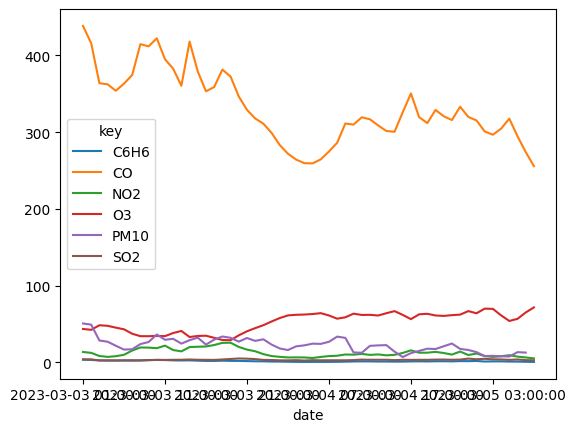

In [86]:
from DB_mapping import engine
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


cnx = engine.connect()
df1 = pd.read_sql_table('stanowiska_pomiarowe', cnx)
df2 = pd.read_sql_table('pomiary', cnx)

df = df1.merge(df2, left_on='id', right_on='sensor_id')
df = df[df['station_id'] == 52]


df = df[['key', 'date', 'value']]
df = pd.pivot_table(df, values='value', index='date', columns='key')

df.plot()
plt.show()




In [4]:
from geopy.distance import distance
location2 = 49.293564, 19.960083


df2 = pd.read_sql_table('stacje_pomiarowe', cnx)
df2 = df2[['gegrLat','gegrLon','stationName']]
dict_of_loc = df2.to_dict('records')
list_of_loc = []
bliskie_loc = []

for item in dict_of_loc:
    one_loc = item['gegrLat'], item['gegrLon'], item['stationName']
    list_of_loc.append(one_loc)
    
for item in list_of_loc:
    item2 = item[0], item[1]
    km = distance(location2, item2)
    if km <= 50:
        bliskie_loc.append(item)

print(bliskie_loc)

2023-03-05 16:25:21,069 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stacje_pomiarowe")
2023-03-05 16:25:21,071 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 16:25:21,076 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stacje_pomiarowe")
2023-03-05 16:25:21,078 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 16:25:21,082 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2023-03-05 16:25:21,084 INFO sqlalchemy.engine.Engine [raw sql] ('stacje_pomiarowe',)
2023-03-05 16:25:21,088 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("stacje_pomiarowe")
2023-03-05 16:25:21,090 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 16:25:21,093 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("stacje_pomiarowe")
2023-03-05 16:25:21,095 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 16:25:21,097 INFO sqlalchemy.engine.Engine 

In [87]:
import folium
from geopy.geocoders import Nominatim

#lokalizowanie wyszukiwania
def lokalizator(loc, promien):

    geolocator = Nominatim(user_agent="my_request")
    location = geolocator.geocode(loc)
    location2 = location.latitude, location.longitude

# zwraca listę stacji(gegrLat, gegrLon, stationName) w podanym promieniu[km] od podanej lokalizacji w lokalizatorze

    df2 = pd.read_sql_table('stacje_pomiarowe', cnx)
    df2 = df2[['gegrLat','gegrLon','stationName']]
    dict_of_loc = df2.to_dict('records')
    list_of_loc = []
    bliskie_loc = []

    for item in dict_of_loc:
        one_loc = item['gegrLat'], item['gegrLon'], item['stationName']
        list_of_loc.append(one_loc)
    
    for item in list_of_loc:
        item2 = item[0], item[1]
        km = distance(location2, item2)
        if km <= promien:
            bliskie_loc.append(item)

   
    m = folium.Map(location=location2, width=800, height=400)
    folium.Marker(location2, popup="Twój adres").add_to(m)
    for item in bliskie_loc:
        locationx = item[0], item[1]
        folium.Marker(locationx, popup=item[2]).add_to(m)
    # wyświetla punkty na mapie
        
    return m
lokalizacja = 'mogilno brzozowa'
promien = 30
lokalizator(lokalizacja, promien)



2023-03-05 18:59:17,656 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("stacje_pomiarowe")
2023-03-05 18:59:17,658 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:59:17,661 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("stacje_pomiarowe")
2023-03-05 18:59:17,662 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:59:17,666 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')
2023-03-05 18:59:17,668 INFO sqlalchemy.engine.Engine [raw sql] ('stacje_pomiarowe',)
2023-03-05 18:59:17,671 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("stacje_pomiarowe")
2023-03-05 18:59:17,672 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:59:17,674 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("stacje_pomiarowe")
2023-03-05 18:59:17,676 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-03-05 18:59:17,681 INFO sqlalchemy.engine.Engine 

In [8]:
from geopy.geocoders import Nominatim
 
#address we need to geocode
loc = 'biedrusko jesionowa'
 
#making an instance of Nominatim class
geolocator = Nominatim(user_agent="my_request")
 
#applying geocode method to get the location
location2 = geolocator.geocode(loc)
 
#printing address and coordinates
print(location2.address)
print((location2.latitude, location2.longitude))


Jesionowa, Osiedle Jesionowe, Biedrusko, gmina Suchy Las, powiat poznański, województwo wielkopolskie, 62-003, Polska
(52.535296, 16.9462903)


In [23]:
from geopy.distance import distance

gegrLat = 49.293564
gegrLon = 19.960083

location = gegrLat, gegrLon

gegrLat2 = 53.161680
gegrLon2 = 17.9078569

location5 = gegrLat2, gegrLon2

km = distance(location, location5)
km

Distance(453.53703823898144)